In [6]:
from sklearn.model_selection import train_test_split
import pandas as pd
df = pd.read_csv('D:/test1(devel_original)', encoding= 'utf-8')

X = df.iloc[:,2:]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=70)

df1 = pd.concat([y_train, X_train], axis=1)
df2 = pd.concat([y_test, X_test], axis=1)
print(df1)
print(df2)
#df1.to_csv('D:/train_final.csv')
#df2.to_csv('D:/devel_final.csv')


train=df1
test=df2
train_X = train.iloc[:,1:]
train_Y = train.iloc[:,0]

test_X = test.iloc[:,1:]
test_Y = test.iloc[:,0]

      label  feature_1646  feature_3311  feature_823  feature_2622  \
1555      4     -0.077750     -0.275683     0.108040     -0.605429   
2105      3      0.026605      0.324206    -0.021528     -0.577969   
140       0     -0.027260     -0.025359     0.027317     -0.425197   
106       3     -0.053214      0.108838    -0.146424     -0.092960   
767       1      0.008146     -0.035302    -0.308727     -0.751416   
...     ...           ...           ...          ...           ...   
436       1     -0.025050     -0.031085     0.020445     -0.359408   
1083      1     -0.034606     -0.102083     0.012192     -0.718343   
1340      1      0.065795     -0.044693     0.057861     -0.701758   
1138      4     -0.255232      0.138174     0.164621     -0.610590   
214       4     -0.157969     -0.137029    -0.076178     -0.384696   

      feature_2571  feature_1790  feature_3254  feature_1044  feature_1618  \
1555      0.048647     -0.008054     -0.061222      0.102992      0.070770   
210

In [33]:
import xgboost as xgb
xg_train = xgb.DMatrix(train_X, label=train_Y)
xg_test = xgb.DMatrix(test_X, label=test_Y)
# setup parameters for xgboost
accuracy=[]
UAR=[]
f1=[]
for i in [10,20,30,40,50,60,70]:
    param = {}
    # use softmax multi-class classification
    param['objective'] = 'multi:softmax'
    # scale weight of positive examples
    param['eta'] = 1
    param['max_depth'] = 6
    #param['silent'] = 1
    param['nthread'] = 4
    param['num_class'] = 8

    watchlist = [(xg_train, 'train'), (xg_test, 'test')]
    num_round = i
    bst = xgb.train(param, xg_train, num_round, watchlist);
    # get prediction
    pred = bst.predict(xg_test)

    import numpy as np
    error_rate = np.sum(pred != test_Y) / len(test_Y)
    accuracy_rate=1-error_rate
    accuracy.append(accuracy_rate)
    print('Test accuracy using softmax = {}'.format(accuracy_rate))

    predl=pred.tolist()
    test_Yl=test_Y.values.tolist()
    from sklearn.metrics import recall_score, f1_score
   # print(recall_score(test_Yl,predl,average='macro'))
    UAR.append(recall_score(test_Yl,predl,average='macro'))
    f1.append(f1_score(test_Yl,predl,average='macro'))


[0]	train-mlogloss:0.90447	test-mlogloss:1.50108
[1]	train-mlogloss:0.59279	test-mlogloss:1.43615


D:\anaconda\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[2]	train-mlogloss:0.38434	test-mlogloss:1.43987
[3]	train-mlogloss:0.25504	test-mlogloss:1.47199
[4]	train-mlogloss:0.18108	test-mlogloss:1.47226
[5]	train-mlogloss:0.13260	test-mlogloss:1.45206
[6]	train-mlogloss:0.10082	test-mlogloss:1.45418
[7]	train-mlogloss:0.07537	test-mlogloss:1.47660
[8]	train-mlogloss:0.05844	test-mlogloss:1.48850
[9]	train-mlogloss:0.04886	test-mlogloss:1.51417
Test accuracy using softmax = 0.6144578313253012
[0]	train-mlogloss:0.90447	test-mlogloss:1.50108
[1]	train-mlogloss:0.59279	test-mlogloss:1.43615


D:\anaconda\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[2]	train-mlogloss:0.38434	test-mlogloss:1.43987
[3]	train-mlogloss:0.25504	test-mlogloss:1.47199
[4]	train-mlogloss:0.18108	test-mlogloss:1.47226
[5]	train-mlogloss:0.13260	test-mlogloss:1.45206
[6]	train-mlogloss:0.10082	test-mlogloss:1.45418
[7]	train-mlogloss:0.07537	test-mlogloss:1.47660
[8]	train-mlogloss:0.05844	test-mlogloss:1.48850
[9]	train-mlogloss:0.04886	test-mlogloss:1.51417
[10]	train-mlogloss:0.04116	test-mlogloss:1.52514
[11]	train-mlogloss:0.03521	test-mlogloss:1.52783
[12]	train-mlogloss:0.02976	test-mlogloss:1.52415
[13]	train-mlogloss:0.02611	test-mlogloss:1.52661
[14]	train-mlogloss:0.02306	test-mlogloss:1.53481
[15]	train-mlogloss:0.02089	test-mlogloss:1.54638
[16]	train-mlogloss:0.01926	test-mlogloss:1.55703
[17]	train-mlogloss:0.01731	test-mlogloss:1.56295
[18]	train-mlogloss:0.01600	test-mlogloss:1.56856
[19]	train-mlogloss:0.01474	test-mlogloss:1.57009
Test accuracy using softmax = 0.6265060240963856
[0]	train-mlogloss:0.90447	test-mlogloss:1.50108
[1]	train-

D:\anaconda\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[2]	train-mlogloss:0.38434	test-mlogloss:1.43987
[3]	train-mlogloss:0.25504	test-mlogloss:1.47199
[4]	train-mlogloss:0.18108	test-mlogloss:1.47226
[5]	train-mlogloss:0.13260	test-mlogloss:1.45206
[6]	train-mlogloss:0.10082	test-mlogloss:1.45418
[7]	train-mlogloss:0.07537	test-mlogloss:1.47660
[8]	train-mlogloss:0.05844	test-mlogloss:1.48850
[9]	train-mlogloss:0.04886	test-mlogloss:1.51417
[10]	train-mlogloss:0.04116	test-mlogloss:1.52514
[11]	train-mlogloss:0.03521	test-mlogloss:1.52783
[12]	train-mlogloss:0.02976	test-mlogloss:1.52415
[13]	train-mlogloss:0.02611	test-mlogloss:1.52661
[14]	train-mlogloss:0.02306	test-mlogloss:1.53481
[15]	train-mlogloss:0.02089	test-mlogloss:1.54638
[16]	train-mlogloss:0.01926	test-mlogloss:1.55703
[17]	train-mlogloss:0.01731	test-mlogloss:1.56295
[18]	train-mlogloss:0.01600	test-mlogloss:1.56856
[19]	train-mlogloss:0.01474	test-mlogloss:1.57009
[20]	train-mlogloss:0.01381	test-mlogloss:1.58073
[21]	train-mlogloss:0.01295	test-mlogloss:1.58990
[22]	tra

D:\anaconda\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[2]	train-mlogloss:0.38434	test-mlogloss:1.43987
[3]	train-mlogloss:0.25504	test-mlogloss:1.47199
[4]	train-mlogloss:0.18108	test-mlogloss:1.47226
[5]	train-mlogloss:0.13260	test-mlogloss:1.45206
[6]	train-mlogloss:0.10082	test-mlogloss:1.45418
[7]	train-mlogloss:0.07537	test-mlogloss:1.47660
[8]	train-mlogloss:0.05844	test-mlogloss:1.48850
[9]	train-mlogloss:0.04886	test-mlogloss:1.51417
[10]	train-mlogloss:0.04116	test-mlogloss:1.52514
[11]	train-mlogloss:0.03521	test-mlogloss:1.52783
[12]	train-mlogloss:0.02976	test-mlogloss:1.52415
[13]	train-mlogloss:0.02611	test-mlogloss:1.52661
[14]	train-mlogloss:0.02306	test-mlogloss:1.53481
[15]	train-mlogloss:0.02089	test-mlogloss:1.54638
[16]	train-mlogloss:0.01926	test-mlogloss:1.55703
[17]	train-mlogloss:0.01731	test-mlogloss:1.56295
[18]	train-mlogloss:0.01600	test-mlogloss:1.56856
[19]	train-mlogloss:0.01474	test-mlogloss:1.57009
[20]	train-mlogloss:0.01381	test-mlogloss:1.58073
[21]	train-mlogloss:0.01295	test-mlogloss:1.58990
[22]	tra

D:\anaconda\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[2]	train-mlogloss:0.38434	test-mlogloss:1.43987
[3]	train-mlogloss:0.25504	test-mlogloss:1.47199
[4]	train-mlogloss:0.18108	test-mlogloss:1.47226
[5]	train-mlogloss:0.13260	test-mlogloss:1.45206
[6]	train-mlogloss:0.10082	test-mlogloss:1.45418
[7]	train-mlogloss:0.07537	test-mlogloss:1.47660
[8]	train-mlogloss:0.05844	test-mlogloss:1.48850
[9]	train-mlogloss:0.04886	test-mlogloss:1.51417
[10]	train-mlogloss:0.04116	test-mlogloss:1.52514
[11]	train-mlogloss:0.03521	test-mlogloss:1.52783
[12]	train-mlogloss:0.02976	test-mlogloss:1.52415
[13]	train-mlogloss:0.02611	test-mlogloss:1.52661
[14]	train-mlogloss:0.02306	test-mlogloss:1.53481
[15]	train-mlogloss:0.02089	test-mlogloss:1.54638
[16]	train-mlogloss:0.01926	test-mlogloss:1.55703
[17]	train-mlogloss:0.01731	test-mlogloss:1.56295
[18]	train-mlogloss:0.01600	test-mlogloss:1.56856
[19]	train-mlogloss:0.01474	test-mlogloss:1.57009
[20]	train-mlogloss:0.01381	test-mlogloss:1.58073
[21]	train-mlogloss:0.01295	test-mlogloss:1.58990
[22]	tra

D:\anaconda\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[2]	train-mlogloss:0.38434	test-mlogloss:1.43987
[3]	train-mlogloss:0.25504	test-mlogloss:1.47199
[4]	train-mlogloss:0.18108	test-mlogloss:1.47226
[5]	train-mlogloss:0.13260	test-mlogloss:1.45206
[6]	train-mlogloss:0.10082	test-mlogloss:1.45418
[7]	train-mlogloss:0.07537	test-mlogloss:1.47660
[8]	train-mlogloss:0.05844	test-mlogloss:1.48850
[9]	train-mlogloss:0.04886	test-mlogloss:1.51417
[10]	train-mlogloss:0.04116	test-mlogloss:1.52514
[11]	train-mlogloss:0.03521	test-mlogloss:1.52783
[12]	train-mlogloss:0.02976	test-mlogloss:1.52415
[13]	train-mlogloss:0.02611	test-mlogloss:1.52661
[14]	train-mlogloss:0.02306	test-mlogloss:1.53481
[15]	train-mlogloss:0.02089	test-mlogloss:1.54638
[16]	train-mlogloss:0.01926	test-mlogloss:1.55703
[17]	train-mlogloss:0.01731	test-mlogloss:1.56295
[18]	train-mlogloss:0.01600	test-mlogloss:1.56856
[19]	train-mlogloss:0.01474	test-mlogloss:1.57009
[20]	train-mlogloss:0.01381	test-mlogloss:1.58073
[21]	train-mlogloss:0.01295	test-mlogloss:1.58990
[22]	tra

D:\anaconda\lib\site-packages\xgboost\core.py:525: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  warnings.warn(


[3]	train-mlogloss:0.25504	test-mlogloss:1.47199
[4]	train-mlogloss:0.18108	test-mlogloss:1.47226
[5]	train-mlogloss:0.13260	test-mlogloss:1.45206
[6]	train-mlogloss:0.10082	test-mlogloss:1.45418
[7]	train-mlogloss:0.07537	test-mlogloss:1.47660
[8]	train-mlogloss:0.05844	test-mlogloss:1.48850
[9]	train-mlogloss:0.04886	test-mlogloss:1.51417
[10]	train-mlogloss:0.04116	test-mlogloss:1.52514
[11]	train-mlogloss:0.03521	test-mlogloss:1.52783
[12]	train-mlogloss:0.02976	test-mlogloss:1.52415
[13]	train-mlogloss:0.02611	test-mlogloss:1.52661
[14]	train-mlogloss:0.02306	test-mlogloss:1.53481
[15]	train-mlogloss:0.02089	test-mlogloss:1.54638
[16]	train-mlogloss:0.01926	test-mlogloss:1.55703
[17]	train-mlogloss:0.01731	test-mlogloss:1.56295
[18]	train-mlogloss:0.01600	test-mlogloss:1.56856
[19]	train-mlogloss:0.01474	test-mlogloss:1.57009
[20]	train-mlogloss:0.01381	test-mlogloss:1.58073
[21]	train-mlogloss:0.01295	test-mlogloss:1.58990
[22]	train-mlogloss:0.01217	test-mlogloss:1.59751
[23]	tr

In [34]:
print(accuracy)
print(UAR)
print(f1)

[0.6144578313253012, 0.6265060240963856, 0.6325301204819277, 0.6325301204819277, 0.6305220883534137, 0.6285140562248996, 0.6345381526104418]
[0.36925217201299604, 0.391337857146547, 0.4044154436693087, 0.40573098273583086, 0.4043342123540613, 0.40628461100287777, 0.4066925211973693]
[0.3843407131018366, 0.412570611491363, 0.4280922677256039, 0.428220003816044, 0.4264012232462063, 0.4284386403775843, 0.42835376974100475]


ValueError: x and y must have same first dimension, but have shapes (5,) and (7,)

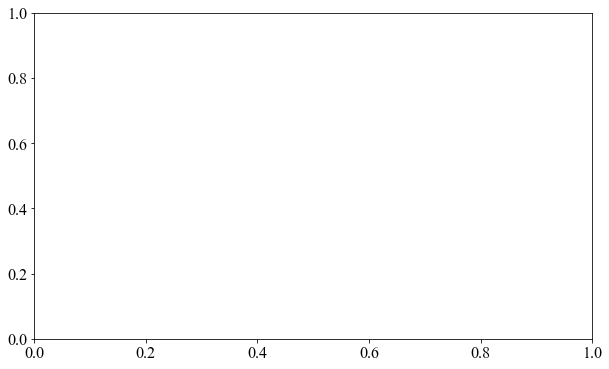

In [37]:
import matplotlib
import matplotlib.pyplot as plt
depth_trees = [2, 3, 4, 5, 6]
plt.rcParams['font.family'] = 'Times New Roman' # 设置字体样式
plt.rcParams['font.size'] = '16' # 设置字体大小
fig = plt.figure(figsize=(10,6))
plt.plot(depth_trees, accuracy, 'r.-', depth_trees, UAR, 'b.-', depth_trees, f1, 'g.-')
plt.xlabel('Tree depth')
plt.ylabel('Metric values')
setx = [2, 3, 4, 5, 6]
plt.xticks(setx)
plt.legend(['Accuracy', 'UAR', 'UF1'])

for i in range(len(accuracy)):
    plt.text(depth_trees[i], accuracy[i], "%.3f" %accuracy[i], fontsize=12, verticalalignment="bottom",horizontalalignment="center")
    plt.text(depth_trees[i], UAR[i], "%.3f" %UAR[i], fontsize=12, verticalalignment="bottom",horizontalalignment="center")
    plt.text(depth_trees[i], f1[i], "%.3f" %f1[i], fontsize=12, verticalalignment="bottom",horizontalalignment="center")
plt.show()


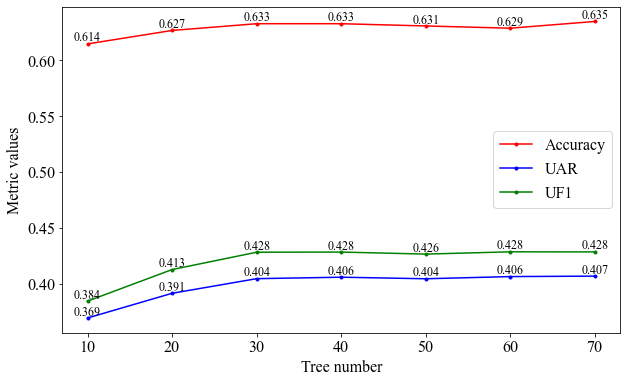

<Figure size 432x288 with 0 Axes>

In [38]:
import matplotlib
import matplotlib.pyplot as plt
depth_trees = [10,20,30,40,50,60,70]
plt.rcParams['font.family'] = 'Times New Roman' # 设置字体样式
plt.rcParams['font.size'] = '16' # 设置字体大小
fig = plt.figure(figsize=(10,6))
plt.plot(depth_trees, accuracy, 'r.-', depth_trees, UAR, 'b.-', depth_trees, f1, 'g.-')
plt.xlabel('Tree number')
plt.ylabel('Metric values')
setx = [10,20,30,40,50,60,70]
plt.xticks(setx)
plt.legend(['Accuracy', 'UAR', 'UF1'])

for i in range(len(accuracy)):
    plt.text(depth_trees[i], accuracy[i], "%.3f" %accuracy[i], fontsize=12, verticalalignment="bottom",horizontalalignment="center")
    plt.text(depth_trees[i], UAR[i], "%.3f" %UAR[i], fontsize=12, verticalalignment="bottom",horizontalalignment="center")
    plt.text(depth_trees[i], f1[i], "%.3f" %f1[i], fontsize=12, verticalalignment="bottom",horizontalalignment="center")
plt.show()
plt.savefig("num.jpg")